# **Bivariate: Cat/Nums: stats**
---

### **Student (T) test**

### Assumptions
    # 1. normal distribution
    # 2. equal variance for each grp(std^2)
    # 3. data is sampled independently b/w grps

if grp size + var = unequal then use welch's T-test

T-test : if there is diff b/w 2 grps means on a seperate numeric var

ANOVA : 2 or more grps, like a pair of grps

___

use histrogram for each grp & check the distance b/w means


if dist big, better difference
like cost is diff

___
if dist small, cost diff less

for large overlap , Tval down - Pval up


range(-∞ , ∞) for T test

for f or ANOVA range(0 , ∞)

In [ ]:
#  for overlapping we can rule out on of the tale and make it one sided tale
#  p value = pval/2 -- one sided test against 2 sided



# for ANOVA get diff and sum them up/ degree of freedom
    # degree of freedom = no of grp - 1




from scipy import stats
import statistics as stat

# list form.
# Notice that you don't have to have the same number of values in each group
edu_PartialHighSchool = [30000, 10000, 10000, 20000, 70000, 30000, 10000, 20000, 10000, 30000]
edu_HighSchool = [20000, 30000, 60000, 20000, 40000, 60000, 60000]
edu_PartialCollege = [60000, 40000, 30000, 130900, 60000, 40000]
edu_Bachelors = [49009, 20000, 90008, 120099, 60000, 130000, 20000, 100000, 80000, 30000, 100000, 120000]
edu_Graduate = [160000, 50000, 80000, 30000, 40000, 80000, 130000, 100000, 50000, 130000]
print('Partial High School: ' + str(int(stat.mean(edu_PartialHighSchool))))
print('High School: ' + str(int(stat.mean(edu_HighSchool))))
print('Partial College: ' + str(int(stat.mean(edu_PartialCollege))))
print('Bachelars: ' +  str(int(stat.mean(edu_Bachelors))))
print('Graduate: ' + str(int(stat.mean(edu_Graduate))))


Partial High School: 24000
High School: 41428
Partial College: 60150
Bachelars: 76593
Graduate: 85000


In [ ]:
# compare partial high to high

t,p = stats.ttest_ind(edu_PartialHighSchool, edu_HighSchool)

print(f' t-value : {t}' )
print(f' t-value : {p}' )

# not much difference to say smth concrete

 t-value : -1.9131753750607223
 t-value : 0.07500898731578687


<ipython-input-12-6d75a3caec9c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(edu_PartialHighSchool, label='Partial high school');
<ipython-input-12-6d75a3caec9c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(edu_HighSchool, label='high school');
<ipython-input-12-6d75a3caec9c>:8: UserWarn

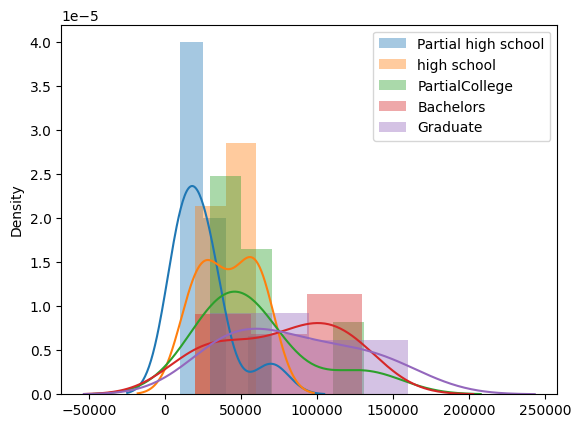

In [ ]:
# this can be used for eda

import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(edu_PartialHighSchool, label='Partial high school');
sns.distplot(edu_HighSchool, label='high school');
sns.distplot(edu_PartialCollege, label='PartialCollege');
sns.distplot(edu_Bachelors, label='Bachelors');
sns.distplot(edu_Graduate, label='Graduate');
plt.legend()

In [ ]:
f,p = stats.f_oneway(edu_PartialHighSchool, edu_HighSchool, edu_Bachelors, edu_Graduate, edu_PartialCollege)

print(f' f-value : {f}' )
print(f' p-value : {p}' )

 f-value : 5.315387416831984
 p-value : 0.0015751737511546366


In [ ]:
# get data into right format
    # 1. grpby
    # 2.
import pandas as pd

df = pd.read_csv("http://www.ishelp.info/data/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


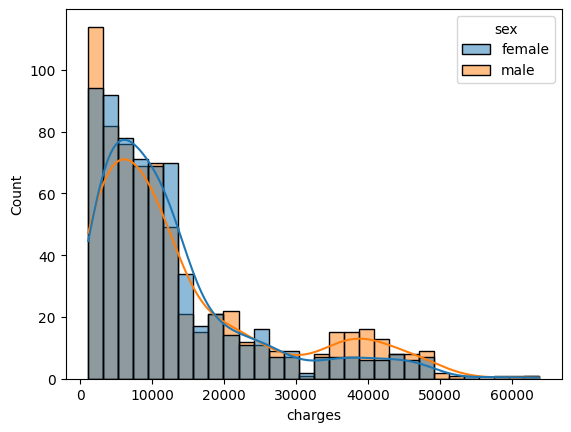

In [ ]:
# hue is used to divide the data via...
sns.histplot(data=df, x='charges', hue='sex', kde=True);

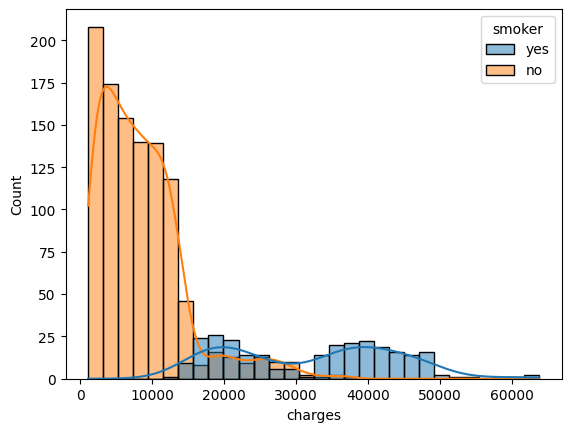

In [ ]:
# now as smoker
sns.histplot(data=df, x='charges', hue='smoker', kde=True);

In [ ]:
# to do each individually

smoker_y = df[df['smoker'] == 'yes']
smoker_n = df[df['smoker'] == 'no']
# for T test
stats.ttest_ind(smoker_y['charges'], smoker_n['charges'])

TtestResult(statistic=46.66492117272371, pvalue=8.271435842179102e-283, df=1336.0)

 **here p val is same as T test cuz for 2 cols**

In [ ]:
# to generate the automated list of each unique categorical value

feature = 'smoker'
label = 'charges'

grps = df[feature].unique()
grpVal= []
for grp in grps:
  grpVal.append(df[df[feature] == grp][label])

grpVal

# for ANOVA we need each list one at a time , so

stats.f_oneway(*grpVal)      # similar to smoker_y = df[df['smoker'] == 'yes']

F_onewayResult(statistic=2177.614868056519, pvalue=8.271435842182967e-283)

# **Numerical Analyses**
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

df = pd.read_csv('http://www.ishelp.info/data/bikebuyers.csv')
df.head()


,ID,Marital Status,Gender,MaritalStatusNumeric,GenderNumeric,Income,Children,EducationNumeric,CommuteDistanceNumeric,Cars,Age,HomeOwnerNumeric,PurchaseBikeNumeric,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,19147,Married,Male,1,0,40000,0,4,1,1,42,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
1,22296,Married,Male,1,0,70000,0,4,1,1,38,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
2,25983,Married,Male,1,0,70000,0,4,1,1,43,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
3,29134,Married,Male,1,0,60000,4,4,5,3,42,0,0,Bachelors,Skilled Manual,No,10+ Miles,North America,No
4,27388,Married,Male,1,0,60000,3,4,2,2,66,0,0,Bachelors,Management,No,1-2 Miles,North America,No


In [ ]:
df.Education.unique()

array(['Bachelors', 'Graduate Degree', 'High School', 'Partial College',
       'Partial High School'], dtype=object)

In [ ]:
# can convert cat into numerical or cat-rank

# edu is order but difference b/w each lvl can be different


df['Education_rank'] = df['Education']
df.Education_rank.replace(['Partial High School', 'High School','Partial College', 'Bachelors', 'Graduate Degree'], [1,2,3,4,5], inplace = True)
df.Education_rank

# if it doesn't change auto into INT64 then use .astype('int64')

0      4
1      4
2      4
3      4
4      4
      ..
995    1
996    1
997    1
998    1
999    1
Name: Education_rank, Length: 1000, dtype: int64

In [ ]:
# since it has some numeric val already we dont have to replace with traditional 1,2,3... rather
# use the lower bound

df['Commute_rank'] = df['Commute Distance']

df.Commute_rank.replace(['0-1 Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles', '10+ Miles'],
[0, 1, 2, 5, 10], inplace=True)

df.astype({'Commute_rank':'int64'})
df.head()

,ID,Marital Status,Gender,MaritalStatusNumeric,GenderNumeric,Income,Children,EducationNumeric,CommuteDistanceNumeric,Cars,...,HomeOwnerNumeric,PurchaseBikeNumeric,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike,Education_rank,Commute_rank
0,19147,Married,Male,1,0,40000,0,4,1,1,...,0,0,Bachelors,Professional,No,0-1 Miles,North America,No,4,0
1,22296,Married,Male,1,0,70000,0,4,1,1,...,0,0,Bachelors,Professional,No,0-1 Miles,North America,No,4,0
2,25983,Married,Male,1,0,70000,0,4,1,1,...,0,0,Bachelors,Professional,No,0-1 Miles,North America,No,4,0
3,29134,Married,Male,1,0,60000,4,4,5,3,...,0,0,Bachelors,Skilled Manual,No,10+ Miles,North America,No,4,10
4,27388,Married,Male,1,0,60000,3,4,2,2,...,0,0,Bachelors,Management,No,1-2 Miles,North America,No,4,1


In [ ]:
# make it as fnc

def clean_bikebuyers():

  import pandas as pd
  df = pd.read_csv('http://www.ishelp.info/data/bikebuyers_original.csv')

  # def new cols
  df['Education_rank'] = df['Education']
  df['Commute_rank'] = df['Commute Distance']
  df['Purchased Bike'] = df['Purchased Bike']

  # conversion
  df.Education_rank.replace(['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree'],
                            [1, 2, 3, 4, 5], inplace=True)
  df.Commute_rank.replace(['0-1 Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles', '10+ Miles'],
                          [0, 1, 2, 5, 10], inplace=True)
  df['Purchased Bike'].replace(['Yes', 'No'], [0, 1], inplace=True)

  # make int64
  df.astype({'Education_rank':'int64'})
  df.astype({'Commute_rank':'int64'})
  df['Purchased Bike'].astype('int64')
  return df


In [ ]:
df = clean_bikebuyers()

### **Bar plots**

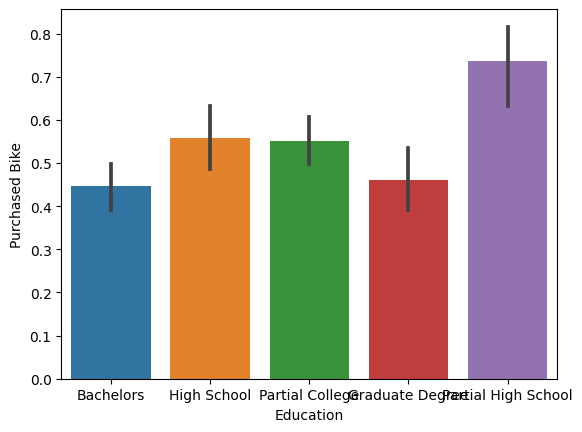

In [ ]:
# way 1
import seaborn as sns
sns.barplot(x=df['Education'], y=df['Purchased Bike']);

# issue - ordering is alphabetical instead of highest to lowes
        # - overlaping

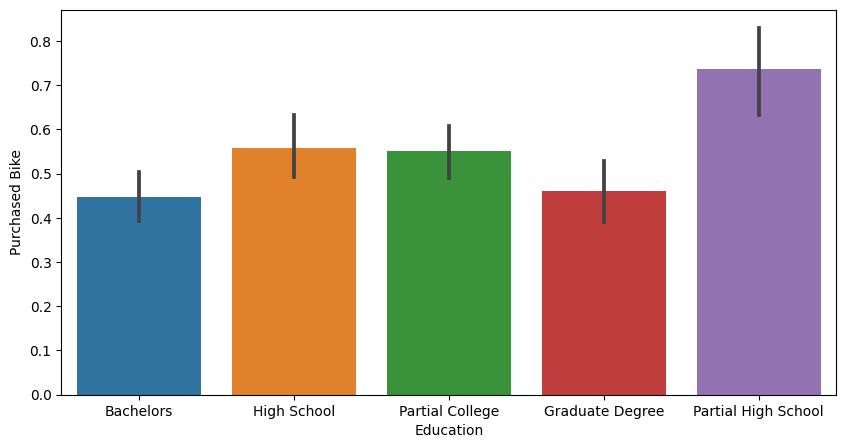

In [ ]:
# for overlap
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(x=df['Education'], y=df['Purchased Bike']);

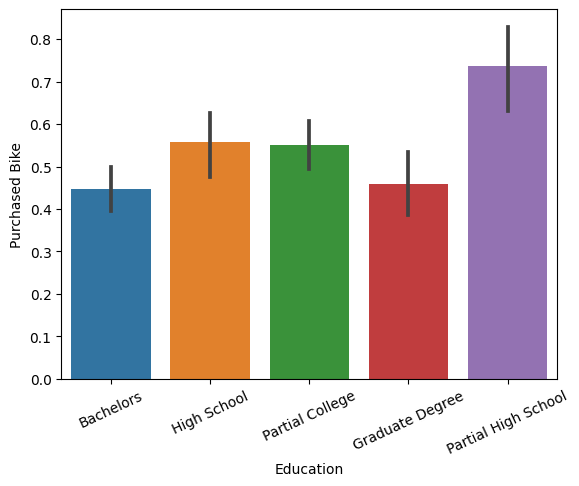

In [ ]:
# for labels
vis = sns.barplot(x=df['Education'], y=df['Purchased Bike']);
vis.set_xticklabels(vis.get_xticklabels(), rotation=25);

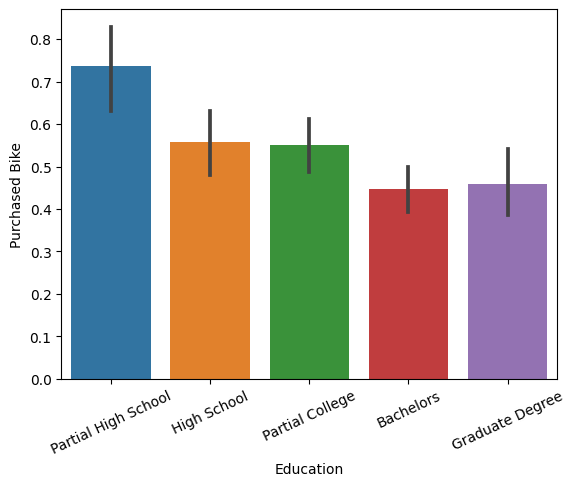

In [ ]:
# to reorder

vis = sns.barplot(x=df['Education'], y=df['Purchased Bike'],
                  order =['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']);
vis.set_xticklabels(vis.get_xticklabels(), rotation=25);

the black mark is the **error or Variance** by default

and the bars are the **avg**

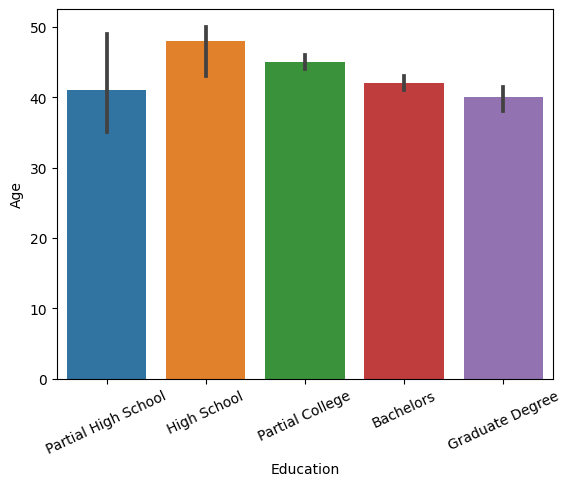

In [ ]:
# set Age as y if we were to use a median

import numpy as np
vis = sns.barplot(x=df['Education'], y=df['Age'], estimator = np.median,
                  order =['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']);
vis.set_xticklabels(vis.get_xticklabels(), rotation=25);

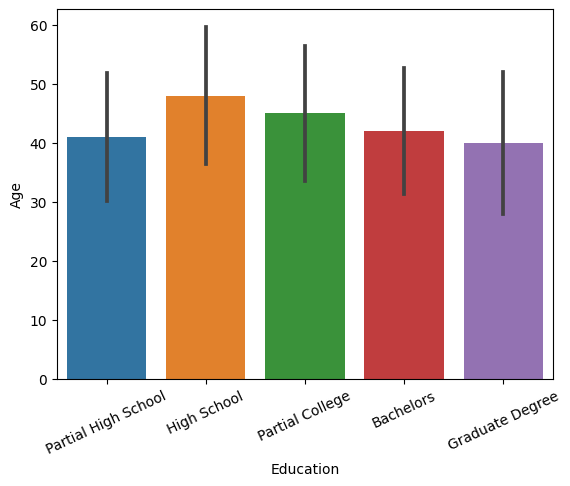

In [ ]:
#  to change the black marks

vis = sns.barplot(x=df['Education'], y=df['Age'], estimator = np.median, errorbar ='sd',
                  order =['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']);
vis.set_xticklabels(vis.get_xticklabels(), rotation=25);

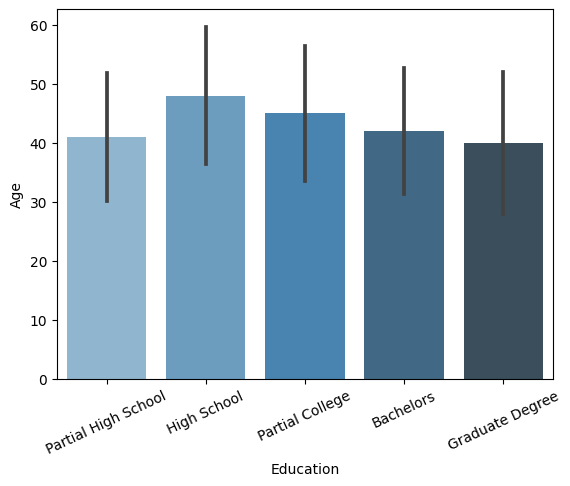

In [ ]:
# to color

vis = sns.barplot(x=df['Education'], y=df['Age'], estimator = np.median, errorbar ='sd', palette = 'Blues_d',
                  order =['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']);
vis.set_xticklabels(vis.get_xticklabels(), rotation=25);

using multiple features with barplot

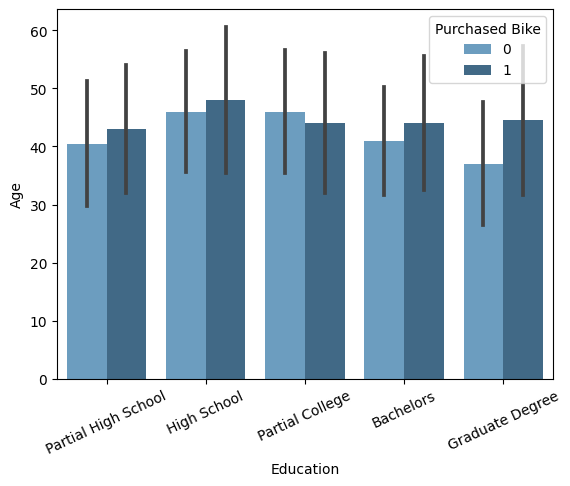

In [ ]:
# using 3 attrs

vis = sns.barplot(x=df['Education'], y=df['Age'], hue = df['Purchased Bike'], estimator = np.median, errorbar ='sd', palette = 'Blues_d',
                  order =['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']);
vis.set_xticklabels(vis.get_xticklabels(), rotation=25);

## **Catplots**
---
and various others
    # boxen
    # box
    #point

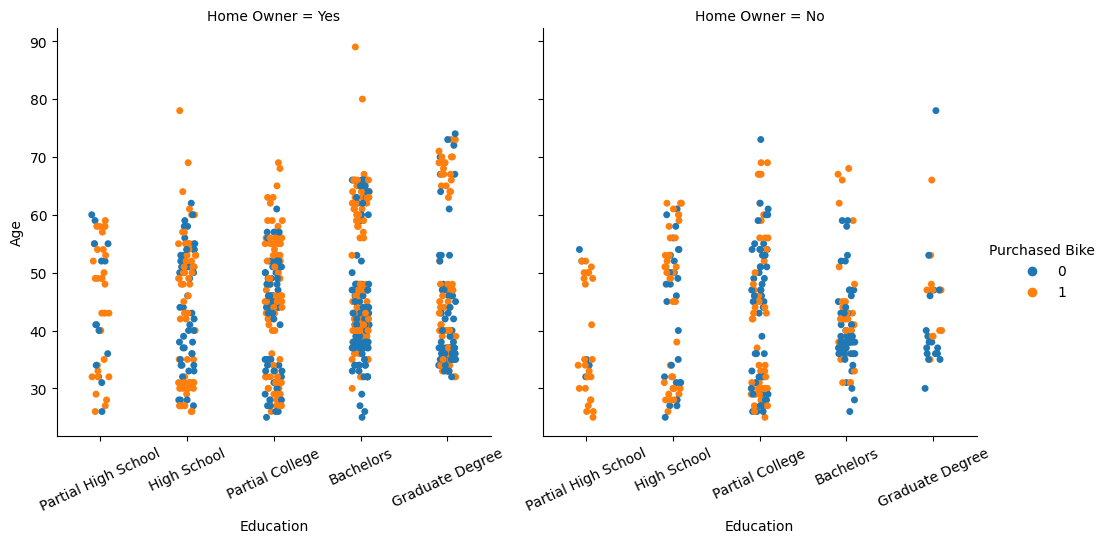

In [ ]:
# using 4 attrs with Catplot - the base ones

vis = sns.catplot(data=df, x='Education', y='Age', hue = 'Purchased Bike', col = 'Home Owner', estimator = np.median, errorbar ='sd',
                  order =['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']);
vis.set_xticklabels(rotation=25);

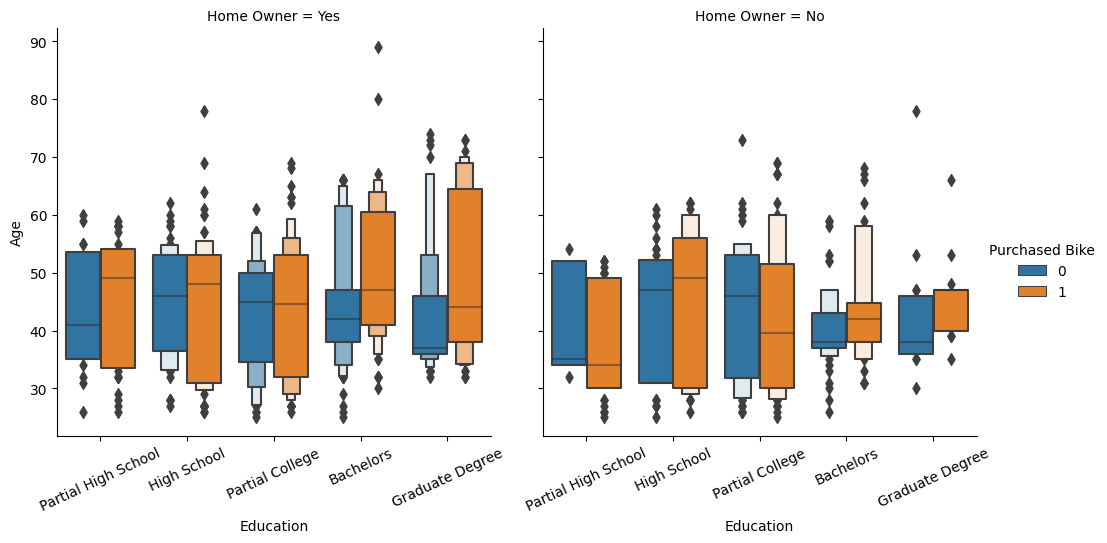

In [ ]:
# kind = boxen


vis = sns.catplot(data=df, x='Education', y='Age', hue = 'Purchased Bike', col = 'Home Owner', estimator = np.median, errorbar ='sd', kind ='boxen',
                  order =['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']);
vis.set_xticklabels(rotation=25);

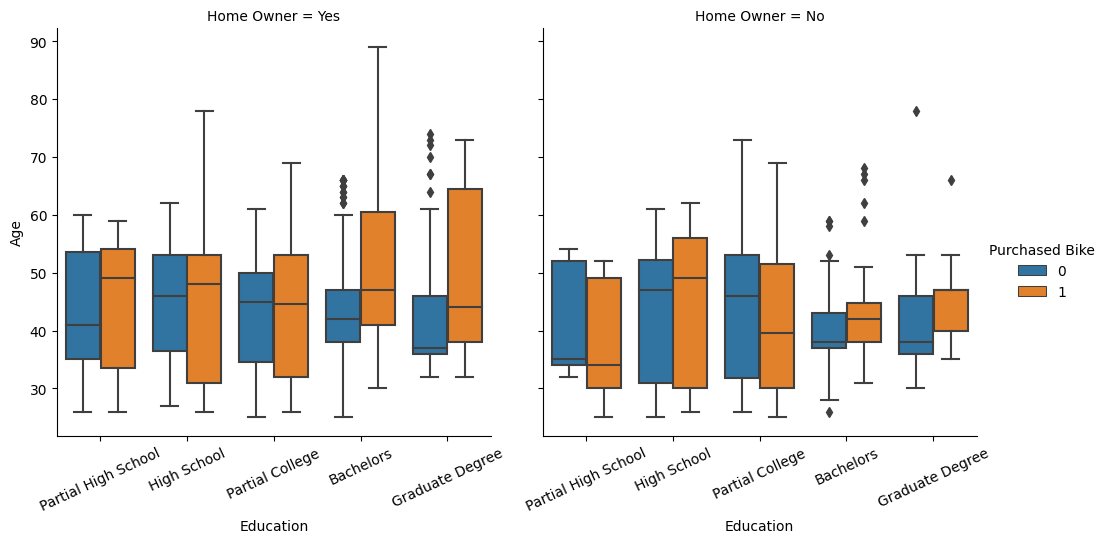

In [ ]:
# box plot

vis = sns.catplot(data=df, x='Education', y='Age', hue = 'Purchased Bike', col = 'Home Owner', estimator = np.median, errorbar ='sd', kind ='box',
                  order =['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']);
vis.set_xticklabels(rotation=25);

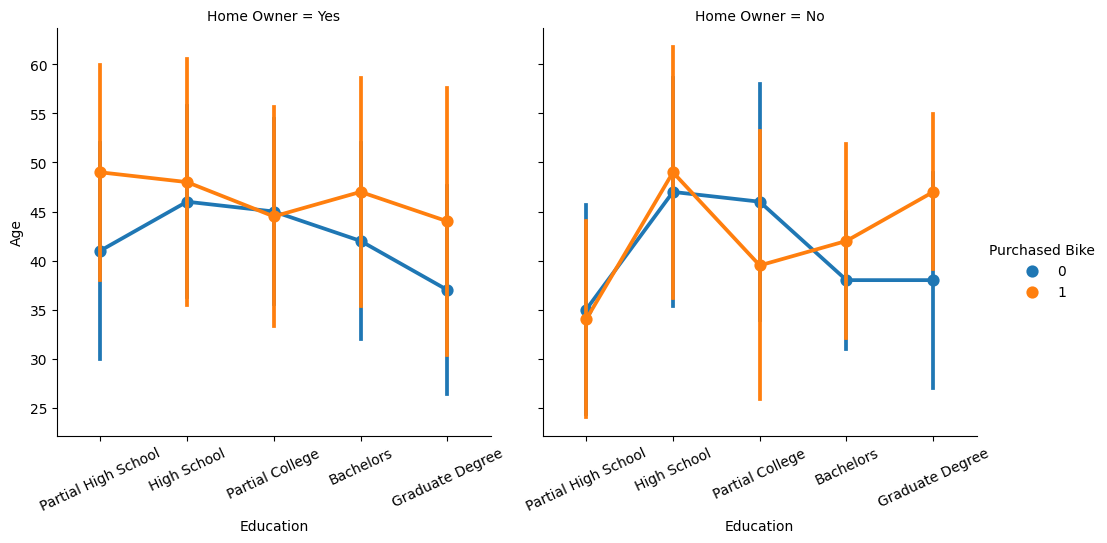

In [ ]:
vis = sns.catplot(data=df, x='Education', y='Age', hue = 'Purchased Bike', col = 'Home Owner', estimator = np.median, errorbar ='sd', kind ='point',
                  order =['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']);
vis.set_xticklabels(rotation=25);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 25.0% of the points cannot be placed

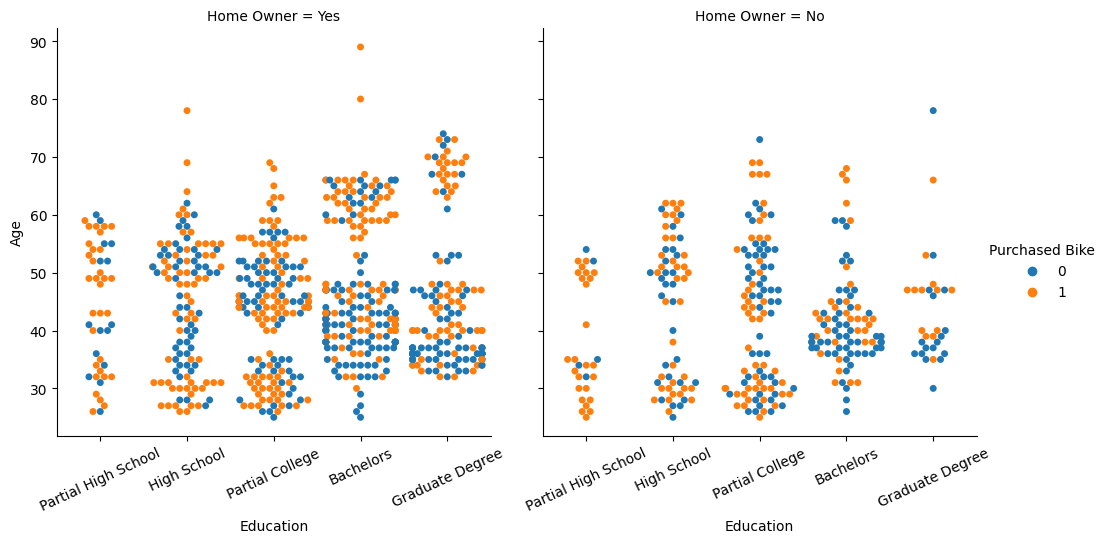

In [ ]:
# swarm plot - doesnt overlap the data pts
# hence the warning

vis = sns.catplot(data=df, x='Education', y='Age', hue = 'Purchased Bike', col = 'Home Owner', estimator = np.median, errorbar ='sd', kind ='swarm',
                  order =['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']);
vis.set_xticklabels(rotation=25);

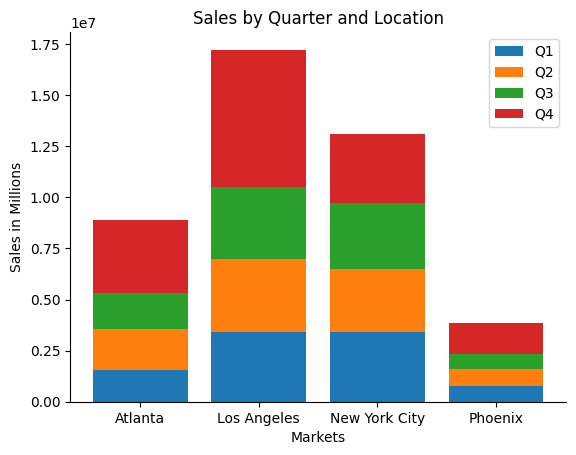

In [ ]:
# stack plot - when a category which adds to total for each level

import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

df = pd.DataFrame({'Locations':['Atlanta', 'Los Angeles', 'New York City', 'Phoenix'],
                  'Q1 Sales':[1567811, 3391023, 3409871, 789123],
                  'Q2 Sales': [1981237, 3609877, 3100098, 810988],
                  'Q3 Sales':[1761231, 3509889, 3209876, 751233],
                  'Q4 Sales': [3578900, 6712333, 3378900, 1500092]})

# Create the positions for the bars
x = np.arange(len(df.Locations))


# Store the three columns from the DataFrame and "flatten" them
# to appear as a regular Python list structure
list_1 = df['Q1 Sales'].values.flatten()
list_2 = df['Q2 Sales'].values.flatten()
list_3 = df['Q3 Sales'].values.flatten()
list_4 = df['Q4 Sales'].values.flatten()


# Plot the bar charts
plt.bar(x,list_1, label='Q1')
plt.bar(x,list_2, bottom=list_1, label='Q2')
plt.bar(x,list_3, bottom=list_1+list_2, label='Q3')
plt.bar(x,list_4, bottom=list_1+list_2+list_3, label='Q4')


# Plot the Pokémon names as the x ticks
plt.xticks(x, df.Locations)


# Create a legend
plt.legend(loc='upper right')

# Add labels and title
plt.xlabel('Markets')
plt.ylabel('Sales in Millions')
plt.title('Sales by Quarter and Location')


# Add an SNS style and increase figure size
sns.set_style("white")
sns.set_context({"figure.figsize": (4, 6)})
sns.despine(top=True, right=True)


# Show the plot
plt.show()

In [ ]:
# get effect size

from scipy import stats
import pandas as pd

df = clean_bikebuyers()

groups = df['Education'].unique()
group_labels = []

for g in groups:
  group_labels.append(df[df['Education'] == g]['Purchased Bike'])

# Now calculate the ANOVA results
F, f_p = stats.f_oneway(*group_labels)
print('F: '+str(round(F, 4)))
print('p: '+str(round(f_p, 4)))

F: 6.4653
p: 0.0


In [ ]:
# can also treat as Num-Num as there is no relation b/w various lvl of edu and purchase
# no effect at individual lv but overall effect for sure

r, p = stats.pearsonr(df['Education_rank'], df['Purchased Bike'])

print('r: '+str(round(r, 4)))
print('p: '+str(round(p, 4)))

r: -0.1408
p: 0.0


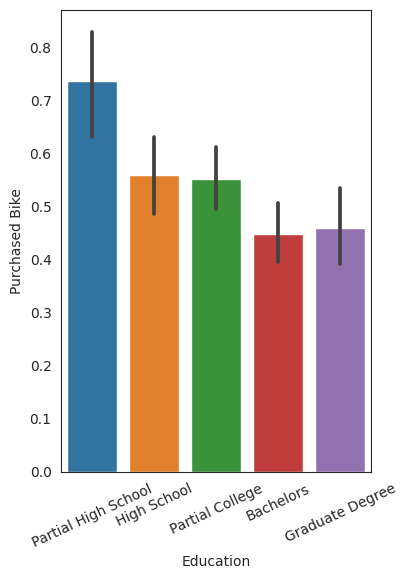

In [ ]:
vis = sns.barplot(x=df['Education'], y=df['Purchased Bike'],
                  order =['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']);
vis.set_xticklabels(vis.get_xticklabels(), rotation=25);

In [ ]:
# diff b/w which is significant - check it via T test

partial_high_school = df[df.Education == 'Partial High School']
high_school = df[df.Education == 'High School']

t, p = stats. ttest_ind(partial_high_school['Purchased Bike'], high_school['Purchased Bike'])
print('t: ' + str(round(t, 2)))
print('p: ' + str(round(p, 2)))

t: 2.7
p: 0.01


In [ ]:
partial_high_school = df[df.Education == 'Partial College']
high_school = df[df.Education == 'High School']

t, p = stats. ttest_ind(partial_high_school['Purchased Bike'], high_school['Purchased Bike'])
print('t: ' + str(round(t, 2)))
print('p: ' + str(round(p, 2)))

t: -0.16
p: 0.87


for more categories , more comparisions meaning it would only be luck to have a good difference instead of considering smth good one.

hence **to avoid that we use Tukey from stats models lib**

In [ ]:
# to get all comparisons at once with better significance

from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['Purchased Bike'], df['Education'])
print(mc.tukeyhsd())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1            group2       meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------
      Bachelors     Graduate Degree   0.0121  0.999 -0.1163 0.1404  False
      Bachelors         High School   0.1109 0.1204 -0.0162 0.2381  False
      Bachelors     Partial College   0.1032 0.0942 -0.0102 0.2166  False
      Bachelors Partial High School   0.2891 0.0001  0.1159 0.4623   True
Graduate Degree         High School   0.0989 0.3297  -0.045 0.2428  False
Graduate Degree     Partial College   0.0912 0.3236 -0.0407  0.223  False
Graduate Degree Partial High School   0.2771 0.0005  0.0913 0.4629   True
    High School     Partial College  -0.0077 0.9998 -0.1385  0.123  False
    High School Partial High School   0.1782 0.0655 -0.0068 0.3632  False
Partial College Partial High School   0.1859 0.0322  0.0101 0.3617   True
--------------------------------------

In [ ]:
from scipy import stats

# this loop would cnt, perform T test for each comparison

edu_types = df.Education.unique() # store stypes
Ttests = [] # store each T test

# loop for each edu

# e for edu, i for enumerate
# enumerate - keep track of no while looping


# first loop for alphabetically picking one
# 2nd loop - to take different for each value within ist loop every time
# both of them makes it not compare it to itself  use i2 > i


for i, e in enumerate(edu_types):
  for i2, e2 in enumerate(edu_types):
    if i2 > i:
      g1 = df[df.Education == e]['Purchased Bike'] # for values in loop 1
      g2 = df[df.Education == e2]['Purchased Bike'] # for values in loop 2 as it compares each edu with bikes

      t, p = stats.ttest_ind(g1, g2)

      Ttests.append([f'{e} - {e2}:' , t.round(4), p.round(4)])


# bonfrroni works is to change the cutt off for signi
# threshold(tells which is significant) = middle / total no

# to access each individually we append list with 3 seperate vals

threshold = 0.05/len(Ttests)
print(f'Significant T-test below {threshold}')

# to get all signi
for t in Ttests:
  if t[2] <= threshold:
    print(t)

Significant T-test below 0.005


Significant T-test below 0.005


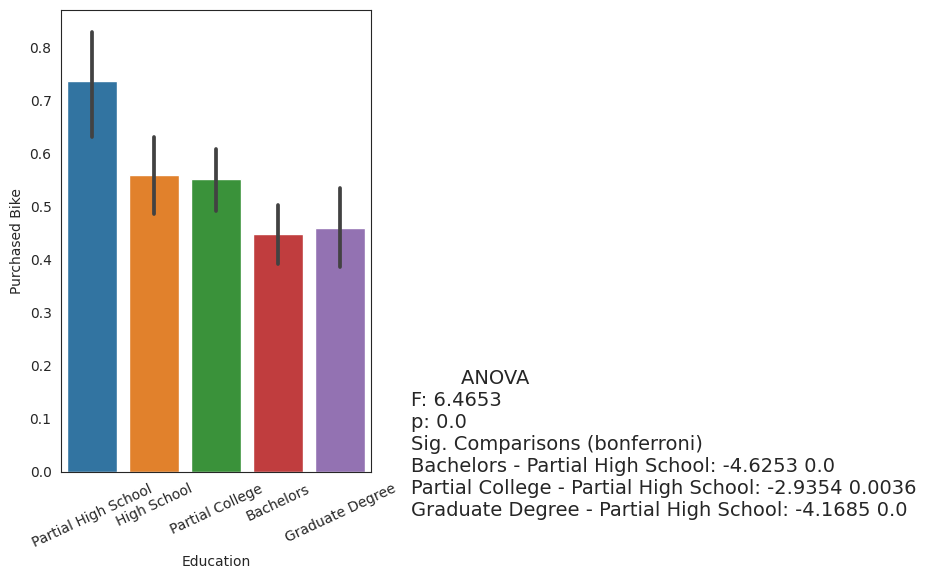

In [ ]:
# combine analysis stats + visualsize relations
# embed text into chart

edu_types = df.Education.unique()
Ttests = []

for i, e in enumerate(edu_types):
  for i2, e2 in enumerate(edu_types):
    if i2 > i:
      g1 = df[df.Education == e]['Purchased Bike']
      g2 = df[df.Education == e2]['Purchased Bike']

      t, p = stats.ttest_ind(g1, g2)

      Ttests.append([f'{e} - {e2}:' , t.round(4), p.round(4)])

# embed text into chart
textstr = f'        ANOVA\n'
textstr += f'F: {F.round(4)}\n'
textstr += f'p: {f_p.round(4)}\n'
textstr += f'Sig. Comparisons (bonferroni)\n'


threshold = 0.05/len(Ttests)
print(f'Significant T-test below {threshold}')

for t in Ttests:
  if t[2] <= threshold:
    textstr += f'{t[0]} {t[1]} {t[2]}\n'


# add into fig
vis = sns.barplot(x=df['Education'], y=df['Purchased Bike'],
                  order =['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']);
vis.set_xticklabels(vis.get_xticklabels(), rotation=25);

plt.text(1, 0, textstr, fontsize = 14, transform=plt.gcf().transFigure);